WeatherPy
----
archivo de trabajo al 9 d efeb de 2021
Note
Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you
think through the steps.

Observable trends:
    
1.- Most of the selected cities are in the northern hemisphere, because in this one, most of the habitable land of the 
planet is found.

2.- Given the above, in the northern hemisphere is where it is possible to find cities that have the lowest maximum
temperatures.

3.- Factors such as humidity, wind speed and cloudiness are not greatly affected by latitude.



In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import itertools as it
from scipy import stats


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities



604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#look for the weather of each city in cities

#config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
key = weather_api_key

#partial query
query_url = f"{url}appid={key}&units={units}&q="

#create the structure of the dataframe
ciudad = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#cities = ["rikitea", "georgetown", "tallahassee"]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    #print(response)
    
    try:
        id = response['id']
        ciudad.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print (f"The city {city} with ID: {id} is being processed")
        
    except (KeyError, IndexError):    
        print(f"{city} missing field/result, keep going!")
        
        
        
        

The city saskylakh with ID: 2017155 is being processed
ozgon missing field/result, keep going!
The city saint-pierre with ID: 935214 is being processed
The city batagay-alyta with ID: 2027042 is being processed
The city luebo with ID: 210939 is being processed
The city victoria with ID: 1819729 is being processed
The city donskoye with ID: 565289 is being processed
The city cape town with ID: 3369157 is being processed
The city upernavik with ID: 3418910 is being processed
The city butaritari with ID: 2110227 is being processed
The city punta arenas with ID: 3874787 is being processed
The city muret with ID: 2991152 is being processed
The city tuktoyaktuk with ID: 6170031 is being processed
The city hermanus with ID: 3366880 is being processed
The city kuroishi with ID: 2129395 is being processed
The city bluff with ID: 2206939 is being processed
The city albany with ID: 5106841 is being processed
The city kasongo-lunda with ID: 2315026 is being processed
The city kurumkan with ID: 202

The city port alfred with ID: 964432 is being processed
The city wajir with ID: 178443 is being processed
The city sydney with ID: 2147714 is being processed
The city pisco with ID: 3932145 is being processed
umzimvubu missing field/result, keep going!
The city kavieng with ID: 2094342 is being processed
The city mocajuba with ID: 3394745 is being processed
The city chipinge with ID: 893549 is being processed
The city opuwo with ID: 3354077 is being processed
The city ukiah with ID: 5404476 is being processed
The city ossora with ID: 2122389 is being processed
The city haines junction with ID: 5969025 is being processed
The city piacabucu with ID: 3454005 is being processed
The city zhezkazgan with ID: 1516589 is being processed
kavant missing field/result, keep going!
The city san cristobal with ID: 3628473 is being processed
aflu missing field/result, keep going!
The city souillac with ID: 933995 is being processed
The city talaya with ID: 2120769 is being processed
The city tasiilaq

The city umm lajj with ID: 100926 is being processed
The city tete with ID: 1026014 is being processed
The city narbonne with ID: 2990918 is being processed
The city sept-iles with ID: 6144312 is being processed
bargal missing field/result, keep going!
The city kulhudhuffushi with ID: 1337613 is being processed
The city kaeo with ID: 2189343 is being processed
tabarqah missing field/result, keep going!
gulshat missing field/result, keep going!
The city teguldet with ID: 1489822 is being processed
The city kieta with ID: 2094027 is being processed
The city maine-soroa with ID: 2441447 is being processed
The city bambous virieux with ID: 1106677 is being processed
The city libreville with ID: 2399697 is being processed
The city porto novo with ID: 2392087 is being processed
The city idah with ID: 2339156 is being processed
The city port-gentil with ID: 2396518 is being processed
The city sosua with ID: 3492627 is being processed
The city nara with ID: 1855612 is being processed
The city 

The city sioux lookout with ID: 6148373 is being processed
The city qaqortoq with ID: 3420846 is being processed
The city agadez with ID: 2448083 is being processed
The city mount isa with ID: 2065594 is being processed
The city vysokogornyy with ID: 2013216 is being processed
barawe missing field/result, keep going!
The city pringsewu with ID: 1630639 is being processed
The city marihatag with ID: 1700933 is being processed
mrirt missing field/result, keep going!
The city maniitsoq with ID: 3421982 is being processed
rungata missing field/result, keep going!
The city itaituba with ID: 3397967 is being processed
samalaeulu missing field/result, keep going!
The city mercedes with ID: 3430708 is being processed
The city gobabis with ID: 3357247 is being processed
The city morgan city with ID: 4333811 is being processed
The city eyl with ID: 60019 is being processed
The city kamaishi with ID: 2112444 is being processed
The city abonnema with ID: 2324433 is being processed
unye missing fie

In [6]:
#craeate df

cities_comp = {
    "City": ciudad, 
    "Lat" : lat, 
    "Lng" : lon, 
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date" : date 
}

city_data = pd.DataFrame(cities_comp)

#drop rows with no values, in the case
city_data = city_data.dropna()

#len(city_data)

city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,-22.99,83,0,7.78,RU,1613000207
1,Saint-Pierre,-21.3393,55.4781,78.80,69,0,6.91,RE,1613000207
2,Batagay-Alyta,67.8006,130.4114,-7.87,88,9,1.12,RU,1613000207
3,Luebo,-5.3500,21.4167,71.06,94,100,1.39,CD,1613000207
4,Hong Kong,22.2855,114.1577,62.01,84,54,7.67,HK,1613000208


In [7]:
#exporting df to csv

city_data.to_csv("city_data.csv", index=False, header=True)



"Max Temperature (F) vs. Latitude"

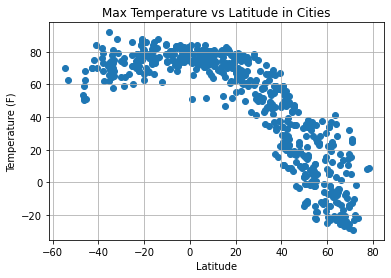

In [8]:
#scatter plot "Max Temperature (F) vs. Latitude"

plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o")

#graph properties
plt.title("Max Temperature vs Latitude in Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("Max Temperature_vs_latitude.png")




Observations "Max Temperature (F) vs. Latitude"

1.- As the graph shows, the closer you are to latitude 0, that is, closer to the equator, the max temperature tends to be higher.
2.- As the graph shows, the closer to high latitudes, the max temperature tends to be lower.
3.- The random sample indicates that there are more cities in higher latitudes than in lower latitudes.


"Humidity (%) vs. Latitude"

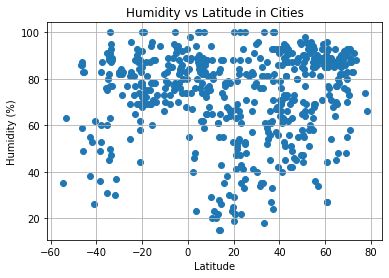

In [9]:
#scatter plot "Humidity (%) vs. Latitude"

plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o")

#graph properties
plt.title("Humidity vs Latitude in Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("Humidity_vs_latitude.png")

Observations "Humidity (%) vs. Latitude"

1.- It is noted that a large part of the cities chosen for the analysis have a humidity close to 80% regardless of the latitude
at which they are located.
2.- It seems that there is no direct relationship between the humidity of the cities and the latitude in which they are.


"Cloudiness vs. Latitude"

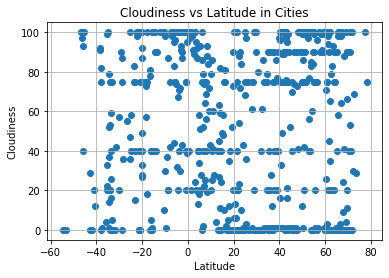

In [10]:
#scatter plot "Cloudiness vs. Latitude"

plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o")

#graph properties
plt.title("Cloudiness vs Latitude in Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("Cloudiness_vs_latitude.png")

Observations "Cloudiness (%) vs. Latitude"

1.- It is noted that the Cloudiness in the selected cities is diverse throughout all latitudes.

2.- It seems that there is no direct relationship between the Cloudiness of the cities and the latitude in which they are.


"Wind Speed vs. Latitude"

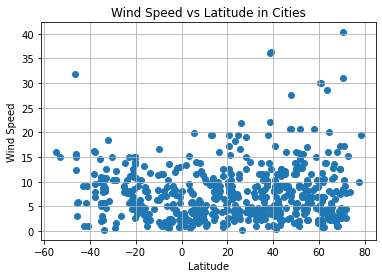

In [11]:
#scatter plot "Wind Speed vs. Latitude"

plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker="o")

#graph properties
plt.title("Wind Speed vs Latitude in Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("WindSpeed_vs_latitude.png")

Observations "Wind Speed (%) vs. Latitude"

1.- The graph shows that the selected cities have a wind speed in the range of 0 to 15 regardless of the latitude in which
they are located.
2.- It seems that there is no direct relationship between the wind speed of the cities and the latitude in which they are.


In [12]:
#create some plots dividing the cities located in Northern Hemisphere and Southern Hemisphere

#creating a dataframe for each Hemisphere

North_cities = city_data.loc[(city_data["Lat"]>=0),:]
South_cities = city_data.loc[(city_data["Lat"]<0),:]


Northern Hemisphere - Max Temperature (F) vs. Latitude

y = -1.41X + 91.76
The correlation between both factors is -0.88


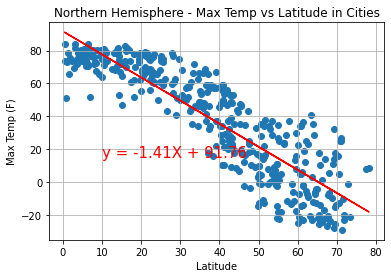

In [13]:
#plot Northern Hemisphere - Max Temperature (F) vs. Latitude

plt.scatter(North_cities["Lat"], North_cities["Max Temp"], marker="o")

#graph properties
plt.title( "Northern Hemisphere - Max Temp vs Latitude in Cities")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(North_cities["Lat"], North_cities["Max Temp"])

regress_values = (North_cities["Lat"]) * slope + intercept

#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
print(line_eq)

plt.plot((North_cities["Lat"]), regress_values, color="red")
plt.annotate(line_eq, (10, 15), fontsize=15, color="red")

correlation = stats.pearsonr(North_cities["Lat"], North_cities["Max Temp"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("Northern Hemisphere - Max Temperature_vs_latitude.png")

plt.show()

Southern Hemisphere - Max Temperature (F) vs. Latitude

y = 0.29X + 81.0
The correlation between both factors is 0.51


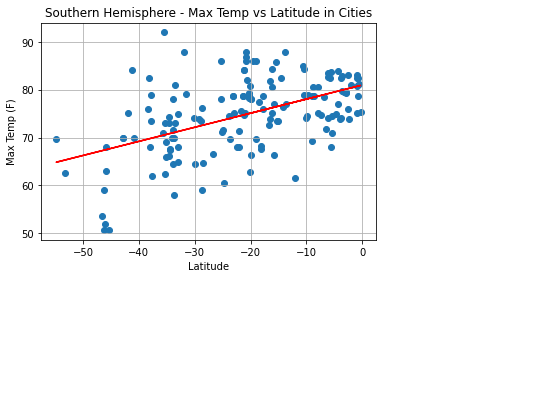

In [14]:
#plot Southern Hemisphere - Max Temperature (F) vs. Latitude

plt.figure()
plt.scatter(South_cities["Lat"], South_cities["Max Temp"], marker="o")

#graph properties
plt.title( "Southern Hemisphere - Max Temp vs Latitude in Cities")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(South_cities["Lat"], South_cities["Max Temp"])

regress_values = (South_cities["Lat"]) * slope + intercept

#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
print(line_eq)

plt.plot((South_cities["Lat"]), regress_values, color="red")
plt.annotate(line_eq, (10, 15), fontsize=15, color="red")

correlation = stats.pearsonr(South_cities["Lat"], South_cities["Max Temp"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("Southern Hemisphere - Max Temperature_vs_latitude.png")

plt.show()

Observations:
    
1.- In the graph of the northern hemisphere, a strong negative correlation is observed, that is, the higher the latitude, the lower
the maximum temperature and in the graph of the southern hemisphere, the correlation is moderate positive, the higher the latitude,
the higher the maximum temperature.    



Northern Hemisphere - Humidity vs. Latitude

y = 0.22X + 63.23
The correlation between both factors is 0.23


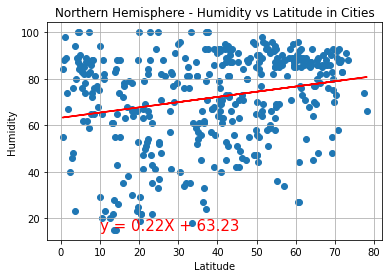

In [15]:
#plot Northern Hemisphere - Humidity vs. Latitude

plt.scatter(North_cities["Lat"], North_cities["Humidity"], marker="o")

#graph properties
plt.title( "Northern Hemisphere - Humidity vs Latitude in Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(North_cities["Lat"], North_cities["Humidity"])

regress_values = (North_cities["Lat"]) * slope + intercept

#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
print(line_eq)

plt.plot((North_cities["Lat"]), regress_values, color="red")
plt.annotate(line_eq, (10, 15), fontsize=15, color="red")

correlation = stats.pearsonr(North_cities["Lat"], North_cities["Humidity"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("Northern Hemisphere - Humidity_vs_latitude.png")

plt.show()

Southern Hemisphere - Humidity vs. Latitude

y = 0.42X + 85.26
The correlation between both factors is 0.37


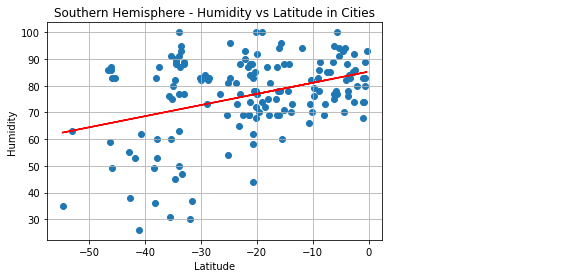

In [16]:
#plot Southern Hemisphere - Humidity vs. Latitude

plt.figure()
plt.scatter(South_cities["Lat"], South_cities["Humidity"], marker="o")

#graph properties
plt.title( "Southern Hemisphere - Humidity vs Latitude in Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(South_cities["Lat"], South_cities["Humidity"])

regress_values = (South_cities["Lat"]) * slope + intercept

#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
print(line_eq)

plt.plot((South_cities["Lat"]), regress_values, color="red")
plt.annotate(line_eq, (10, 15), fontsize=15, color="red")

correlation = stats.pearsonr(South_cities["Lat"], South_cities["Humidity"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("Southern Hemisphere - Humidity_vs_latitude.png")

plt.show()


Observations:
    
1.- The graphs of both hemispheres, the north and the south show a weak positive correlation, as latitude increases, a slight
increase in humidity in cities 

Northern Hemisphere - Cloudiness vs. Latitude

y = 0.21X + 44.25
The correlation between both factors is 0.11


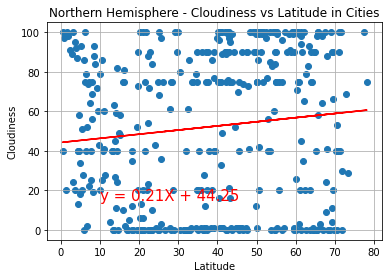

In [17]:
#plot Northern Hemisphere - Cloudiness vs. Latitude

plt.scatter(North_cities["Lat"], North_cities["Cloudiness"], marker="o")

#graph properties
plt.title( "Northern Hemisphere - Cloudiness vs Latitude in Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(North_cities["Lat"], North_cities["Cloudiness"])

regress_values = (North_cities["Lat"]) * slope + intercept

#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
print(line_eq)

plt.plot((North_cities["Lat"]), regress_values, color="red")
plt.annotate(line_eq, (10, 15), fontsize=15, color="red")

correlation = stats.pearsonr(North_cities["Lat"], North_cities["Cloudiness"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("Northern Hemisphere - Cloudiness_vs_latitude.png")

plt.show()

Southern Hemisphere - Cloudiness vs. Latitude

y = 0.67X + 70.16
The correlation between both factors is 0.25


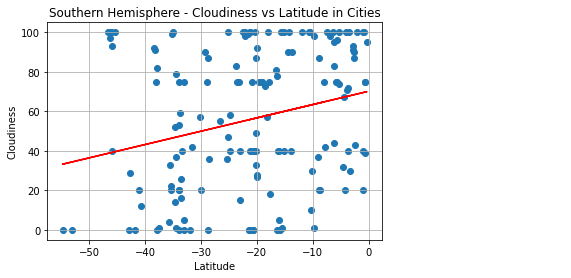

In [18]:
#plot Southern Hemisphere - Cloudiness vs. Latitude

plt.figure()
plt.scatter(South_cities["Lat"], South_cities["Cloudiness"], marker="o")

#graph properties
plt.title( "Southern Hemisphere - Cloudiness vs Latitude in Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(South_cities["Lat"], South_cities["Cloudiness"])

regress_values = (South_cities["Lat"]) * slope + intercept

#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
print(line_eq)

plt.plot((South_cities["Lat"]), regress_values, color="red")
plt.annotate(line_eq, (10, 15), fontsize=15, color="red")

correlation = stats.pearsonr(South_cities["Lat"], South_cities["Cloudiness"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("Southern Hemisphere - Cloudiness_vs_latitude.png")

plt.show()

Observations:
    
1.- The graph of the northern hemisphere shows that the Cloudiness increases slightly as the latitude increases, weak correlation
2.- While the graph of the southern hemisphere shows that the Cloudiness increase faster as the latitude increases, also weak correlation.

Northern Hemisphere - Wind Speed vs. Latitude

y = 0.04X + 6.29
The correlation between both factors is 0.14


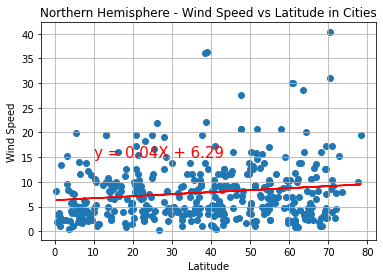

In [19]:
#plot Northern Hemisphere - Wind Speed vs. Latitude

plt.scatter(North_cities["Lat"], North_cities["Wind Speed"], marker="o")

#graph properties
plt.title( "Northern Hemisphere - Wind Speed vs Latitude in Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(North_cities["Lat"], North_cities["Wind Speed"])

regress_values = (North_cities["Lat"]) * slope + intercept

#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
print(line_eq)

plt.plot((North_cities["Lat"]), regress_values, color="red")
plt.annotate(line_eq, (10, 15), fontsize=15, color="red")

correlation = stats.pearsonr(North_cities["Lat"], North_cities["Wind Speed"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("Northern Hemisphere - Wind Speed_vs_latitude.png")

plt.show()

Southern Hemisphere - Wind Speed vs. Latitude

y = -0.11X + 5.3
The correlation between both factors is -0.32


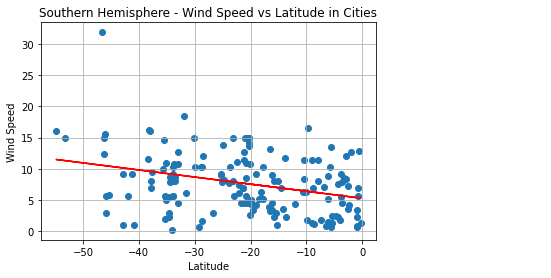

In [20]:
#plot Southern Hemisphere - Wind Speed vs. Latitude

plt.figure()
plt.scatter(South_cities["Lat"], South_cities["Wind Speed"], marker="o")

#graph properties
plt.title( "Southern Hemisphere - Wind Speed vs Latitude in Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(South_cities["Lat"], South_cities["Wind Speed"])

regress_values = (South_cities["Lat"]) * slope + intercept

#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
print(line_eq)

plt.plot((South_cities["Lat"]), regress_values, color="red")
plt.annotate(line_eq, (10, 15), fontsize=15, color="red")

correlation = stats.pearsonr(South_cities["Lat"], South_cities["Wind Speed"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("Southern Hemisphere - Wind Speed_vs_latitude.png")

plt.show()

Observations:
    
1.- Both graphs of the northern and southern hemispheres that relate wind speed versus latitude show that there is no 
correlation between the two factors.